In [25]:
import pandas as pd
import re
import string
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


In [26]:
# Chargement du modèle et du vectorizer
with open("modele_rf.pkl", "rb") as f:
    clf = pickle.load(f)

with open("vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)

# Chargement des données test
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv").squeeze()  # s'assure que c'est une Series (1D)

# Vectorisation des commentaires test
X_test_vect = vectorizer.transform(X_test.iloc[:, 0])  # important : extraire la colonne de texte si besoin

# Prédiction avec le modèle entraîné
y_pred = clf.predict(X_test_vect)

# Rapport de classification
print("\n=== Rapport de classification ===\n")
print(classification_report(y_test, y_pred))


=== Rapport de classification ===

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       1.00      1.00      1.00        49
           2       1.00      0.97      0.99       106
           3       1.00      0.56      0.71         9
           4       0.96      0.99      0.98       328
           5       0.99      0.99      0.99       293

    accuracy                           0.98       800
   macro avg       0.99      0.90      0.93       800
weighted avg       0.98      0.98      0.98       800



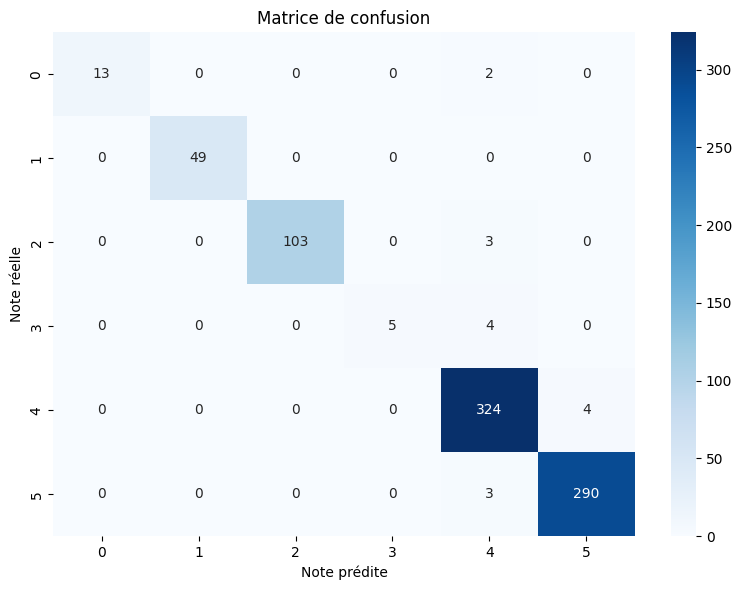

In [ ]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y_test.unique())  # récupère les vraies classes uniques

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Matrice de confusion")
plt.xlabel("Note prédite")
plt.ylabel("Note réelle")
plt.tight_layout()
plt.show()

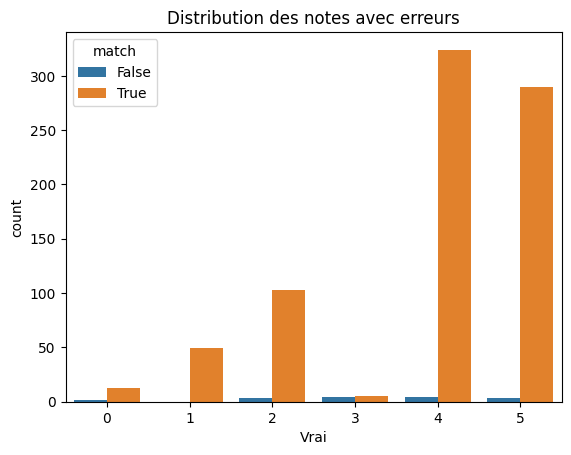

In [29]:
# Creation d'une DataFrame pour comparer les prédictions avec les vraies classes
df_eval = pd.DataFrame({
    'Vrai': y_test,     # Les vraies étiquettes (notes réelles)
    'Prédit': y_pred    # Les prédictions faites par le modèle
})

# On ajoute une colonne booléenne : True si la prédiction est correcte, False sinon
df_eval['match'] = df_eval['Vrai'] == df_eval['Prédit']

# On trace un graphique à barres (barplot) qui montre la distribution des vraies notes
sns.countplot(x='Vrai', data=df_eval, hue='match')
plt.title("Distribution des notes avec erreurs")
plt.show()
